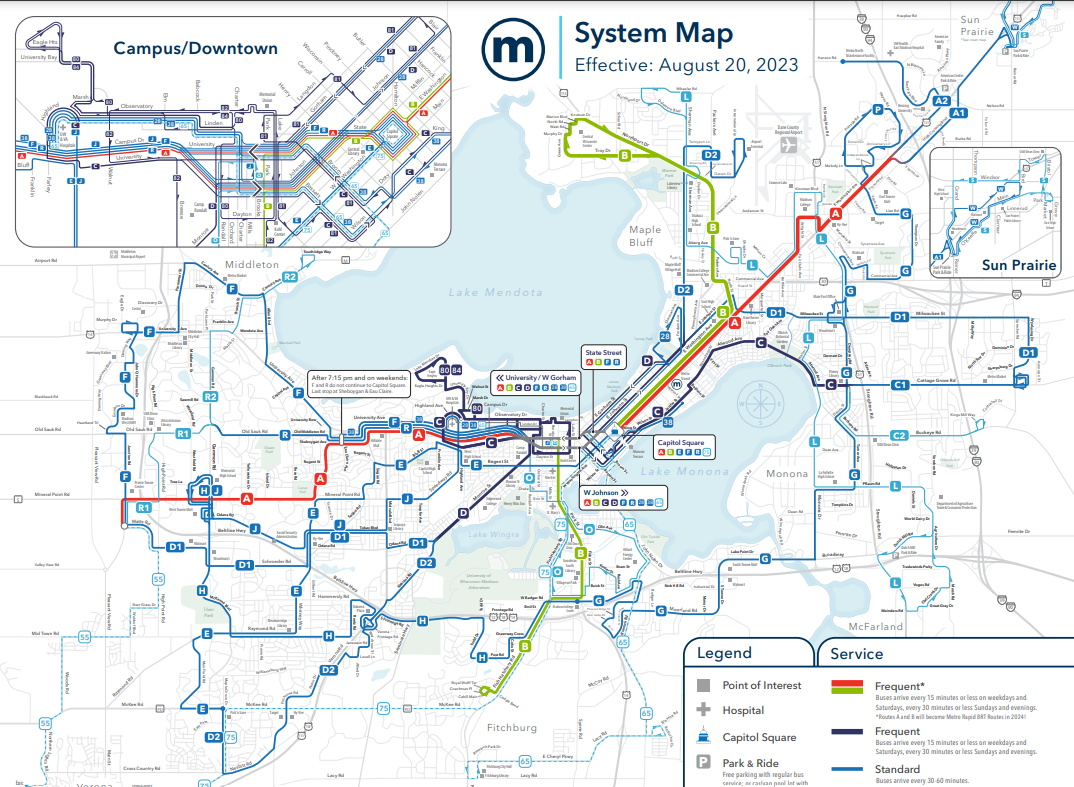

## Warmup 0

In [ ]:
import os
import requests
import pandas as pd
from bs4 import BeautifulSoup

# New!
import sqlite3

#### Take a look at this HTML Table of Volunteer Hours

<table>
    <tr> <th>Name</th><th>Week 1</th><th>Week 2</th><th>Week 3</th> </tr>
    <tr> <td>Therese</td><td>13</td><td>4</td><td>5</td> </tr>
    <tr> <td>Carl</td><td>5</td><td>7</td><td>8</td> </tr>
    <tr> <td>Marie</td><td>2</td><td>9</td><td>11</td> </tr>
</table>

## Warmup 1 : Parse this using Beautiful Soup, and first extract the header as a list

In [ ]:
# write your code here

## Warmup 2: Make a dictionary mapping name to total hours

In [ ]:
# write your code here

## Database 1

### Learning Objectives:

- Explain how a database is different from a CSV file or a JSON file
- Use SQLite to connect to a database and pandas to query the database
- Write basic queries on a database using SELECT, FROM, WHERE, ORDER BY, and LIMIT



To start, we will go over the slides to explain what Databases and SQL are


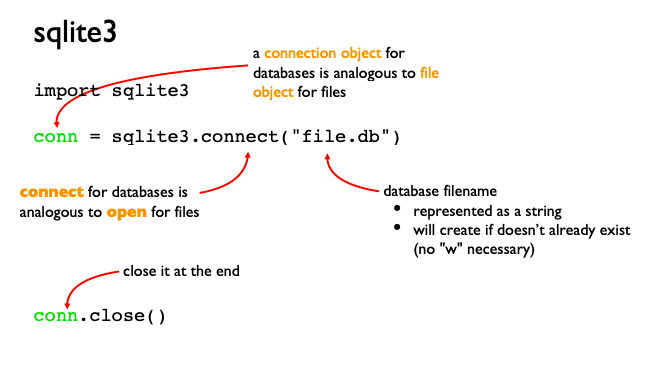

In [ ]:
db_name = "bus.db"
assert os.path.exists(db_name)

# open a connection object to our database file
conn = sqlite3.connect(db_name)
# note: we need to close 'conn' when we are done, at the end of the notebook file
type(conn)

### Pandas has a function  `pd.read_sql(query, connection)`
- Allows us to process an SQL `query` on `connection`
- stores the result in a Pandas DataFrame

In [ ]:
# This command helps us know the table names 
df = pd.read_sql("""
    SELECT *
    FROM sqlite_master
""", conn)
df

### Databases are more structured than CSV and JSON files:
- all data contained inside one or more tables
- all tables must be named, all columns must be named 
- all values in a column must be the same type

In [ ]:
# This command shows how our database was set up
# Note the table names, we will use them later. Also note the column names
# Finally, note that types are more formal, different than Python, and strictly enforced

for command in df["sql"]:
    print(command)

### Most basic SQL query

#### `Select` Column(s) from Table

##### Can use `*` to mean "all columns"

In [ ]:
pd.read_sql("select * from routes", conn)

## Exercise 1: Extract all data from the `stops` table

In [ ]:
# write your code here

## More Complicated Queries:

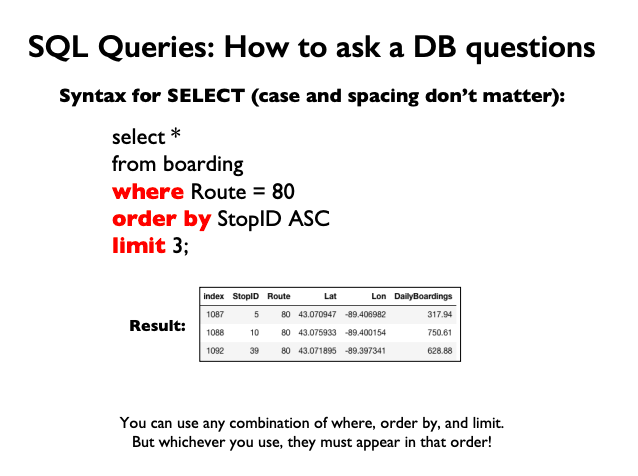

## Example 1: Of the stops that are eastbound, what are the top 10 southern stops?

In [ ]:
query = """
    SELECT *  
    FROM stops  
    WHERE cardinal_direction = 90
    ORDER BY stop_lat
    LIMIT 10
"""
pd.read_sql(query, conn)

## Example 2: Find the route service name for the "E" route

In [ ]:
query = """
    select *
    from routes
    where route_short_name = 'E'
"""
pd.read_sql(query, conn).iloc[0]['route_service_name']

## Example 3: Find the stop name of the west-most bus stop

In [ ]:
query = """
    select stop_name
    from stops
    order by stop_lon ASC
"""
pd.read_sql(query, conn).iloc[0]["stop_name"]

## Example 4: What are the names and descriptions of the westbound stops that are wheelchair-accessible and managed by the city of Sun Prarie (CSUN)?

Order your answer by the name of the street

In [ ]:
query = """
    select stop_name, stop_desc
    from stops
    where cardinal_direction = 270 and jurisdiction_id = 'CSUN' and wheelchair = 1
    order by primary_street ASC
"""
pd.read_sql(query, conn)

## Exercise 2: What is the URL I can go to to learn more about Route J?

In [ ]:
# write your code here

## Exercise 3: How many stops does the City of Fitchburg (CFIT) have jurisdiction over?

In [ ]:
# write your code here

## Example 5: How many stops does the City of Fitchburg (CFIT) have jurisdiction over?

In [ ]:
query = """
    select COUNT(*) as TOTAL
    from stops
    where jurisdiction_id = 'CFIT'
""" # next time!
pd.read_sql(query, conn).iloc[0]['TOTAL']

#### Don't forget to close your connection!

In [ ]:
conn.close()